<a href="https://colab.research.google.com/github/UKD1211/100_days_ML_cX_ISI_DS/blob/main/gradient_descent_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

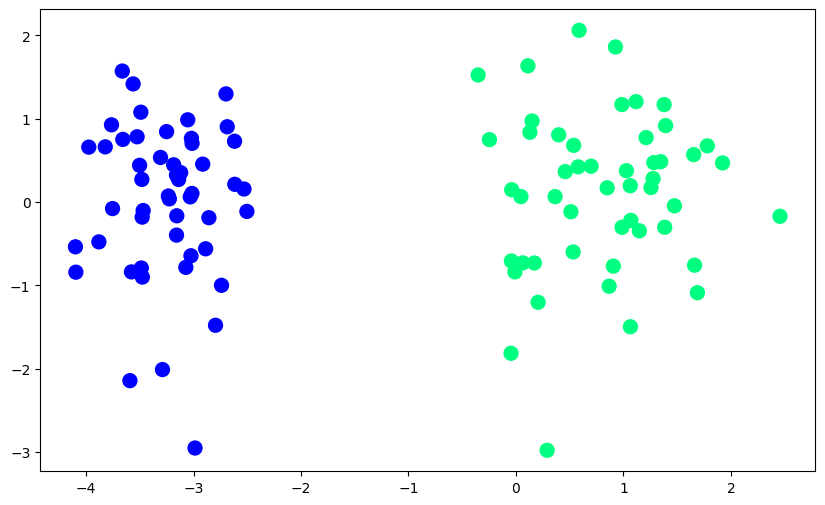

In [32]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1],c = y,cmap='winter',s = 100)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lor = LogisticRegression(penalty=None, solver = 'sag')
lor.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [35]:
lor.coef_

array([[4.8983411 , 0.23951197]])

In [36]:
lor.intercept_

array([5.86151215])

In [37]:

m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [38]:

x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [39]:
class UKDlorgd:
  pass

In [49]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def UKDlrgd(X, y):
    epochs = 2500
    lr = 0.05

    X_mod = np.insert(X, 0, 1, axis=1)   # design matrix with bias
    weights = np.zeros(X_mod.shape[1])
    n = X_mod.shape[0]

    for _ in range(epochs):
        z = np.dot(X_mod, weights)                 # (n,)
        y_hat = sigmoid(z)                         # (n,)
        gradient = np.dot(X_mod.T, (y_hat - y)) / n
        weights = weights - lr * gradient

    return weights[0], weights[1:]


In [50]:

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def gd(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[1:],weights[0]

In [51]:
coef_,intercept_ = gd(X,y)

In [52]:
print(coef_,intercept_)

[4.83926872 0.21182255] 5.83338864905325


In [53]:

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [54]:

x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

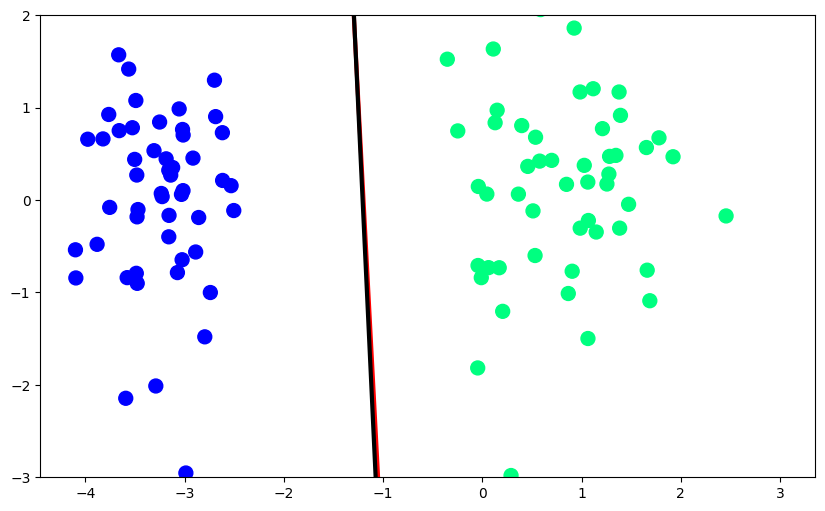

In [55]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)